## A.1. Find the most heated countries/areas

We collected data from the Berkeley Earth data webpage (http://berkeleyearth.lbl.gov/country-list/) 
using a webscraper script. The data are saved in a csv file: country_t_incr_list.csv


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import codes
from codes import webscraper_country
from codes import webscraper_country_warming
#webscraper_country.output_country_list()
#webscraper_country.generate_country_csv()
#webscraper_country.generate_metadata_csv()
webscraper_country_warming.output_country_t_incr_list()

In [5]:
df = pd.read_csv('./data_files/country_t_incr_list.csv')
display(df.head(4))

,Country,Warming_since_1960,Warming_since_1960_uncertainty,Region
0,afghanistan,3.32,0.34,Asia
1,åland,3.01,0.24,Europe
2,albania,1.97,0.28,Europe
3,algeria,2.86,0.28,Africa


In [27]:
df['Country']=df['Country'].str.capitalize() 
df_warm = df.copy().set_index('Country')
df_warm = df_warm.sort_values(by=['Warming_since_1960'], ascending = False).head(10)
display(df_warm)

,Warming_since_1960,Warming_since_1960_uncertainty,Region
Country,,,
Svalbard-and-jan-mayen,5.45,0.81,Europe
Canada,3.64,0.24,North America
Greenland,3.57,0.75,North America
Denmark,3.56,0.74,North America
Iran,3.52,0.37,Asia
Russia,3.39,0.28,Asia
United-arab-emirates,3.36,0.57,Asia
Afghanistan,3.32,0.34,Asia
Qatar,3.30,0.49,Asia


The above table shows the most heated countries since 1960. This list contains one country in Europe, three countries in North America, and six countries in Asia.

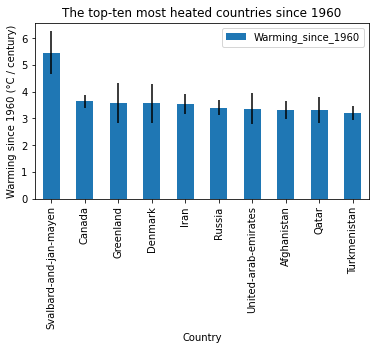

In [28]:
df_warm.plot(kind='bar', yerr='Warming_since_1960_uncertainty')
plt.ylabel('Warming since 1960 (°C / century)')
plt.title('The top-ten most heated countries since 1960')
#plt.xticks(rotation = -50)
plt.gca().set_aspect(0.8)
fig.autofmt_xdate()
#plt.tight_layout()
plt.savefig('The most heated countries.png',bbox_inches = "tight")

The table below shows the least heated countries since 1960. Even for those countries, their temperatures have increased at least 0.65 °C/century, which means global warming is happening all across the world.

In [29]:
df_warm2 = df.copy().set_index('Country')
df_warm2 = df_warm2.sort_values(by=['Warming_since_1960'], ascending = True).head(10)
display(df_warm2)

,Warming_since_1960,Warming_since_1960_uncertainty,Region
Country,,,
Bolivia,0.65,0.29,South America
Macau,0.79,0.29,Asia
Hong-kong,0.83,0.27,Asia
Bangladesh,0.90,0.41,Asia
Timor-leste,0.90,0.41,Asia
Vietnam,0.91,0.27,Asia
Palau,0.91,0.27,NaN
Peru,0.95,0.34,South America
Laos,0.96,0.28,Asia


## A.2. Analysis of the time series data for the most heated countries

Next, we conducted a detailed analysis of the time series data for the top 5 most heated countries. Our research focused on the temperature variation, heating rate, etc.....